# Recommender System based on Item Item Similarity

In [71]:
import numpy as np
import pandas as pd

In [72]:
column_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('movie data.data',sep='\t', names=column_names)
ratings.head()

,user_id,movie_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now load the movie titles

In [73]:
titles = pd.read_csv('Movie_Id_Titles.txt')
titles.rename(columns={'item_id':'movie_id', 'title':'movie_title'}, inplace=True)
titles.head()

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merge two dataframe

In [74]:
ratings_with_title = ratings.merge(titles, on='movie_id')
ratings_with_title.head()

,user_id,movie_id,rating,timestamp,movie_title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


No. of Uniques Movies

In [75]:
len(ratings['movie_id'].unique())

1682

No. of Unique Users

In [6]:
len(ratings['user_id'].unique())

944

# EDA

    1. Count plot for ratings. 
    2. Top 10 movies
    3. Movie which is rated by most users.
    4. Movie with highest ratings.
    5. Movie with lowest ratings.

## Countplot for ratings

In [8]:
import seaborn as sns

/Users/uttam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

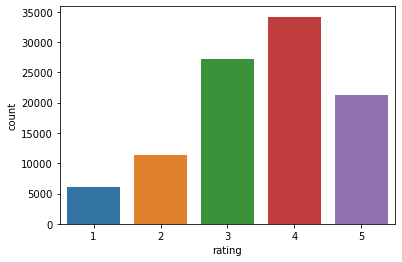

In [9]:
sns.countplot(ratings['rating'])

In [15]:
#number of unique movies
len(ratings['movie_id'].unique())

1682

## Top 10 movies 

Only considering movies which are rated by more than 100 viewers

In [17]:
ratings.groupby('movie_id').count()

,user_id,rating,timestamp
movie_id,,,
1,452,452,452
2,131,131,131
3,90,90,90
4,209,209,209
5,86,86,86
...,...,...,...
1678,1,1,1
1679,1,1,1
1680,1,1,1


In [35]:
top_movies_by_rating = ratings.groupby('movie_id').agg({'user_id':'count','rating':'mean'}).reset_index()
top_movies_by_rating.columns = ['movie_id','viewer_count','avg_rating']

top10_movies_by_rating = top_movies_by_rating[top_movies_by_rating['viewer_count']>=100].sort_values(by = ['avg_rating'], ascending=False)

top10_movies_by_rating.merge(titles, on='movie_id')[:10]

,movie_id,viewer_count,avg_rating,movie_title
0,408,112,4.491071,"Close Shave, A (1995)"
1,318,298,4.466443,Schindler's List (1993)
2,169,118,4.466102,"Wrong Trousers, The (1993)"
3,483,243,4.456790,Casablanca (1942)
4,64,283,4.445230,"Shawshank Redemption, The (1994)"
5,603,209,4.387560,Rear Window (1954)
6,12,267,4.385768,"Usual Suspects, The (1995)"
7,50,584,4.359589,Star Wars (1977)
8,178,125,4.344000,12 Angry Men (1957)
9,134,198,4.292929,Citizen Kane (1941)


# 10 Movies with least rating

In [37]:
top10_movies_by_rating.merge(titles, on='movie_id')[-10:]

,movie_id,viewer_count,avg_rating,movie_title
328,264,101,2.742574,Mimic (1997)
329,926,101,2.702970,Down Periscope (1996)
330,259,162,2.685185,George of the Jungle (1997)
331,231,142,2.683099,Batman Returns (1992)
332,29,114,2.666667,Batman Forever (1995)
333,358,143,2.615385,Spawn (1997)
334,260,127,2.574803,Event Horizon (1997)
335,325,128,2.546875,Crash (1996)
336,243,132,2.439394,Jungle2Jungle (1997)
337,122,106,2.339623,"Cable Guy, The (1996)"


In [50]:
top10_movies_by_rating.merge(titles, on='movie_id')[-1:]

,movie_id,viewer_count,avg_rating,movie_title
337,122,106,2.339623,"Cable Guy, The (1996)"


## Movie rated by most viewer

In [55]:
top_movies_by_rating.sort_values(by=['viewer_count'], ascending=False).merge(titles,on='movie_id')

,movie_id,viewer_count,avg_rating,movie_title
0,50,584,4.359589,Star Wars (1977)
1,258,509,3.803536,Contact (1997)
2,100,508,4.155512,Fargo (1996)
3,181,507,4.007890,Return of the Jedi (1983)
4,294,485,3.156701,Liar Liar (1997)
...,...,...,...,...
1677,1576,1,1.000000,"Hungarian Fairy Tale, A (1987)"
1678,1577,1,1.000000,"Death in the Garden (Mort en ce jardin, La) (1..."
1679,1348,1,1.000000,Every Other Weekend (1990)
1680,1579,1,1.000000,Baton Rouge (1988)


Movie rated by most users was <b> Star Wars (1977) </b>

In [59]:
moviemat = ratings_with_title.pivot_table(index='user_id',columns='movie_title',values='rating')
moviemat.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# movie similar to Close Shave, A (1995)
close_shave_ratings = moviemat['Close Shave, A (1995)']

In [64]:
movie_similar_to_close_shave = moviemat.corrwith(close_shave_ratings)

In [65]:
movie_similar_to_close_shave

movie_title
'Til There Was You (1997)               -1.000000
1-900 (1994)                             1.000000
101 Dalmatians (1996)                   -0.144924
12 Angry Men (1957)                     -0.141596
187 (1997)                               0.705534
                                           ...   
Young Guns II (1990)                    -0.132453
Young Poisoner's Handbook, The (1995)    0.399426
Zeus and Roxanne (1997)                       NaN
unknown                                       NaN
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [70]:
corr_close_shave = pd.DataFrame(movie_similar_to_close_shave,columns=['Correlation']).reset_index()
corr_close_shave.dropna(inplace=True)
#corr_close_shave.sort_values(by=['Correlation'], ascending=False)
corr_close_shave

,movie_title,Correlation
0,'Til There Was You (1997),-1.000000
1,1-900 (1994),1.000000
2,101 Dalmatians (1996),-0.144924
3,12 Angry Men (1957),-0.141596
4,187 (1997),0.705534
...,...,...
1655,Year of the Horse (1997),1.000000
1657,Young Frankenstein (1974),0.144077
1658,Young Guns (1988),-0.338869
1659,Young Guns II (1990),-0.132453


# With Sparse Matrix

In [113]:
ratings_with_title.head()

,user_id,movie_id,rating,timestamp,movie_title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [147]:
from scipy import sparse

sparse_matrix = sparse.csr_matrix((ratings_with_title.rating.values, (ratings_with_title.user_id.values, 
                                                                     ratings_with_title.movie_id.values)))

In [148]:
sparse_matrix

<944x1683 sparse matrix of type '<class 'numpy.int64'>'
	with 100003 stored elements in Compressed Sparse Row format>

In [149]:
sparse_matrix.shape

(944, 1683)

In [150]:
len(ratings_with_title.movie_id.unique())

1682

In [151]:
us,mv = sparse_matrix.shape
elem = sparse_matrix.count_nonzero()

print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Train matrix : 93.70556260511395 % 


In [155]:
len(np.unique(sparse_matrix.nonzero()[1]))

1682

In [162]:
 row_ind, col_ind = sparse_matrix.nonzero()

In [164]:
len(np.unique(row_ind))

944

## Getting top 10 similar users

In [179]:
from sklearn.metrics.pairwise import cosine_similarity

def user_user_similarity(sparse_matrix,top=10):
    
    no_of_users, _ = sparse_matrix.shape
    
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    uni_row_ind = np.unique(row_ind)
    rows, cols, data = list(), list(), list()
    
    for row in uni_row_ind:
        
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()

        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top) # here row number will be the user id, multiplication by top as we are calculating top 10 similar users only
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users))
    
    


In [180]:
u_u_sim_sparse= user_user_similarity(sparse_matrix,100)

In [181]:
user_ids = np.unique(u_u_sim_sparse.nonzero()[1])

In [182]:
len(user_ids)

944

In [183]:
u_u_sim_sparse

<944x944 sparse matrix of type '<class 'numpy.float64'>'
	with 94400 stored elements in Compressed Sparse Row format>

In [186]:
#top 10 similar users for user 

#start = datetime.now()
similar_users = dict()
for user in user_ids:
    # get the top similar movies and store them in the dictionary
    sim_users = u_u_sim_sparse[user].toarray().ravel().argsort()[::-1][1:]
    similar_users[user] = sim_users[:10]
#print(datetime.now() - start)

# just testing similar user for user_id 5
similar_users[5]

array([307, 648, 407, 497, 660, 268,  22, 622,  56, 279])

# Computing movie movie similarity

In [187]:
m_m_sim_sparse = cosine_similarity(sparse_matrix.T, dense_output=False)

In [188]:
m_m_sim_sparse.shape

(1683, 1683)

In [189]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [190]:
#top 10 similar movies for a movie_id 

#start = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    # get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:10]
#print(datetime.now() - start)

# just testing similar user for user_id 5
similar_movies

{1: array([ 50, 181, 121, 117, 405, 151, 222, 100, 237, 174]),
 2: array([233, 161, 385, 403,  62, 576, 226, 231, 550,  96]),
 3: array([ 410,  763,   42,   33,  250,   17, 1047,  825,  475,  235]),
 4: array([ 56, 204, 174, 202,  96, 195, 172, 216,  79, 385]),
 5: array([218, 219,  54, 234,  53,  98, 672, 200, 665, 559]),
 6: array([1370, 1129, 1196,  221, 1202,  766,  547,   13, 1553, 1342]),
 7: array([100,  50, 117,  56, 181,   1, 121, 151, 405,  98]),
 8: array([204, 174, 423, 173, 172,  69,  71,  79, 168, 191]),
 9: array([100, 276, 127,   7, 237, 508,  50, 124,   1,  98]),
 10: array([190,  20, 582,  52, 713,  83, 275, 124, 100, 137]),
 11: array([ 56,  22,  12,  79, 195,  98,  96, 174,  64, 568]),
 12: array([ 56,  98,  64,  11, 174,  79, 182, 100,  96, 176]),
 13: array([100, 124,   7, 137, 116,  14, 285, 276,  25, 111]),
 14: array([275, 285, 137, 100, 116, 170, 124,   9, 462, 276]),
 15: array([237, 121,   1,  25, 111, 117, 282, 125, 181, 118]),
 16: array([1115,   20, 1163,